In [3]:
### IMPORT LIBRARIES

# import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats

In [4]:
### DEFINE FUNCTIONS TO IMPORT JASON DATA

import json

def ParseJSON(fileName=None):

   data = []
   if fileName is None: raise ValueError("fileName cannot be None")
   with open(fileName) as fp:
        for line in fp:
            data.append(json.loads(line))


   return(data)


#### pass the data list and the token, get the list of the particular field back
def ProcessID(data,token):

   ID = []

   for item in data:

       ID.append(item[token])

   return(ID)

In [5]:
######## LOAD ONLY 1,2, OR 3

### 1. LOAD ORIGINAL DATA

biz = pd.DataFrame(ParseJSON(fileName = 'Data/yelp_academic_dataset_business.json'))
biz.shape
data = biz[:]

In [ ]:
### 2. LOAD BINARY DATA - BIZ DATA with RESTO INDICATOR
gdata = gl.load_sframe('businessdatabinary')
biz = gdata.to_dataframe()
data = biz[:]

In [5]:
### 3. LOAD BINARY DATA - BIZ DATA with RESTOS ONLY
gdata = gl.load_sframe('restosdatabinary')
biz = gdata.to_dataframe()
data = biz[:]

In [12]:
minidata=data[:30]
minidata.loc[:,"restoind"]=0
minidata.shape

(30, 16)

In [16]:
i=2
minidata.iloc[i,15]=1

In [6]:
###********* DO NOT RUN!!! ***********************
### ADD RESTO INDICATOR TO EACH RECORD
resto = ["Restaurants","Bistros","Brasseries","Cafes","Delicatessen"]
record=[]
data.loc[:,"restoind"] = 0

/Users/gldomingo/Data_Science/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gldomingo/Data_Science/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
for i in range(data.shape[0]):
    record = data.iloc[i,:]
    k=0
    if not i % 1000:
        print i
    for cat in record['categories']:
        if k > 0:
            break
        if (cat in resto):
            k += 1 
            data.iloc[i,15]=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


In [ ]:
categories = data['categories']

for i in range(categories.shape[0]):
    if not i % 1000:
        print i
    var = categories.iloc[i]
    if len((set(var).intersection(set(resto))))>0: data.iloc[i,15] = 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [14]:
data.shape
data.head(2)

(77445, 16)

In [7]:
categories.shape

(77445,)

In [12]:
restodata.shape

(2585, 16)

In [11]:
### CREATE NEW DATABASE WITH RESTAURANT TYPES ONLY
restodata = data.loc[data["restoind"]==1,]

In [107]:
### SAVE RESTO DATA IN BINARY FORMAT
restodata = restodata[:14]
restodata.head(1)
gl.SFrame(restodata).save('restosdatabinary')

In [110]:
### CREATE MINI DATASET FOR TESTING CODE
minidata = data[:20]

In [66]:
### CHECK MISSING DATA
# data.apply(lambda x: sum(x.isnull()),axis=0)

In [111]:
### GET COLUMN NAMES
n = data.keys()
n

Index([u'attributes', u'business_id', u'categories', u'city', u'full_address',
       u'hours', u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'review_count', u'stars', u'state', u'type'],
      dtype='object')

In [112]:
### SUMMARIZE DATA
data.describe()

,latitude,longitude,open,review_count,stars
count,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000
mean,38.250452,-93.123086,0.773543,59.529663,3.482358
std,6.048762,30.914435,0.418547,145.558399,0.749558
min,32.876619,-115.351900,0.000000,3.000000,1.000000
25%,33.565844,-112.273148,1.000000,7.000000,3.000000
50%,36.071293,-111.869248,1.000000,19.000000,3.500000
75%,43.014973,-80.044005,1.000000,57.000000,4.000000
max,56.036545,8.549249,1.000000,5642.000000,5.000000


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


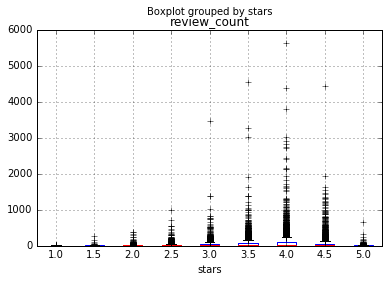

In [69]:
%pylab inline
# data.boxplot(column='review_count', by = 'stars')
data.boxplot(column='review_count', by = 'stars')

Populating the interactive namespace from numpy and matplotlib


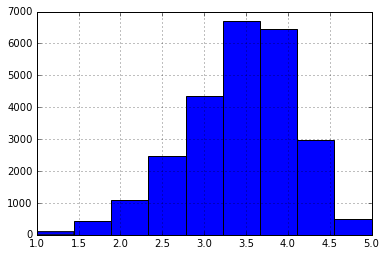

In [70]:
### HISTOGRAM
%pylab inline
data['stars'].hist(bins=9)

In [81]:
data.head(2)


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': 1, u'Drive-Thru': 0, u'Alcohol':...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],1,4,4.5,PA,business
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.413464,-79.880247,Emil's Lounge,[],1,20,5.0,PA,business


In [23]:
### ADD FEATURES
#data["elitecnt"] = data["elite"].apply(len)
#data["friendscnt"] = data["friends"].apply(len)
#data["totcompliments"] = [sum(x.values()) for x in data["compliments"]]
#data["totvotes"] = [sum(x.values()) for x in data["votes"]]
#data.head(2)

In [24]:
### REDUCE FEATURES AND CONVERT TO SFRAME
#kdata = gl.SFrame(data[[0,3,6,8,10,11,12,13,14]])
#kdata.head(2)

In [25]:
### RUN K-MEANS MODEL
# kmeans_model = gl.kmeans.create(kdata, num_clusters=25, batch_size=50000,
#                                max_iterations=20)

#kmeans_model = gl.kmeans.create(kdata, num_clusters=25, max_iterations=200)
#kmeans_model.summary()

In [26]:
### VIEW CLUSTER RESULTS
#print kmeans_model["cluster_id"]
#kmeans_model["cluster_info"]

In [14]:
### GET COLUMN NAMES FOR SFRAMES
kdata.column_names

In [27]:
#kdata.show

In [56]:
### LOOK AT FIRST FEW RECORDS
data.head(2)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,restoind
0,"{u'Take-out': 1, u'Drive-Thru': 0, u'Good For'...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Thursday': {u'close': u'21:00', u'open': u'...",40.354327,-79.900706,Mr Hoagie,[],1,4,4.5,PA,business,1
1,"{u'Happy Hour': 1, u'Accepts Credit Cards': 1,...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],1,4,3.5,PA,business,0


In [82]:
### Counts
data['stars'].value_counts().head()

3.5    6706
4.0    6450
3.0    4345
4.5    2976
2.5    2478
Name: stars, dtype: int64

In [125]:
#data['categories'].values
#any(el[1] == 'str_1' for el in t)
any(cat == 'Restaurant' for cat in data.categories[0])
[n for n, (i, s) in enumerate(t) if s == 'str_3']
#data.categories.values
# sum(data.loc[data['elitecnt']!=0,'elitecnt'].value_counts())
# data.loc[data['elitecnt']!=0,'elitecnt'].value_counts()

<generator object <genexpr> at 0x1626c30f0>

In [165]:
def ProcessID(data,token):

    ID = []

    for item in data:
        if token in item.keys():
            ID.append(item[token])
        else:
            ID.append({})

    return(ID)


In [188]:
print minidata.attributes

0     {u'Take-out': 1, u'Drive-Thru': 0, u'Alcohol':...
1     {u'Alcohol': u'full_bar', u'Noise Level': u'av...
2     {u'Alcohol': u'full_bar', u'Noise Level': u'lo...
3     {u'Take-out': 1, u'Drive-Thru': 0, u'Alcohol':...
4     {u'Alcohol': u'full_bar', u'Noise Level': u'av...
5     {u'Alcohol': u'none', u'Noise Level': u'averag...
6     {u'Take-out': 1, u'Alcohol': u'none', u'Noise ...
7     {u'Take-out': 1, u'Alcohol': u'full_bar', u'Go...
8     {u'Wheelchair Accessible': 1, u'Take-out': 1, ...
9     {u'Take-out': 1, u'Alcohol': u'none', u'Noise ...
10    {u'Take-out': 1, u'Wi-Fi': u'no', u'Alcohol': ...
11    {u'Wheelchair Accessible': 1, u'Take-out': 1, ...
12    {u'Wheelchair Accessible': 0, u'Take-out': 1, ...
13    {u'Take-out': 1, u'Noise Level': u'average', u...
14    {u'Wheelchair Accessible': 1, u'Take-out': 1, ...
15    {u'Take-out': 1, u'Alcohol': u'full_bar', u'Go...
16    {u'Alcohol': u'full_bar', u'Noise Level': u've...
17    {u'Take-out': 1, u'Wi-Fi': u'free', u'Driv

In [246]:
### GET PRICE RANGE OF RESTAURANTS

pricerange=[]
for i in range(len(data)):
    x = data.iloc[i].attributes.get("Price Range")
    pricerange.append(x)

print len(pricerange)
sum([1 for x in pricerange if x!=None])

# pricerange

25082


23415

In [208]:
### GET OUTDOOR SEATING OF RESTAURANTS

outdoor = []
for i in range(len(data)):
    x = data.iloc[i].attributes.get("Outdoor Seating")
    outdoor.append(x)

print len(outdoor)
sum([1 for x in outdoor if x==1])

# outdoor

25082


9504

In [ ]:
### GET TYPE OF RESTAURANT

restotype = []
for i in range(len(minidata)):
    x = minidata.iloc[i].categories.get("Outdoor Seating")
    restotype.append(x)

print len(restotype)
sum([1 for x in restotype if x==1])

# restotype

In [212]:
minidata.categories

0                              [Fast Food, Restaurants]
1     [Bars, American (New), Nightlife, Lounges, Res...
2     [Bars, American (Traditional), Nightlife, Rest...
3     [Burgers, Breakfast & Brunch, American (Tradit...
4     [Bars, American (Traditional), Nightlife, Loun...
5         [Breakfast & Brunch, Sandwiches, Restaurants]
6                                  [Cafes, Restaurants]
7           [Pubs, Irish, Nightlife, Bars, Restaurants]
8                                         [Restaurants]
9                                [Chinese, Restaurants]
10                [American (Traditional), Restaurants]
11                               [Restaurants, Italian]
12    [American (Traditional), Comfort Food, Caterer...
13                        [Italian, Pizza, Restaurants]
14                    [Burgers, Fast Food, Restaurants]
15    [Pubs, Bars, American (New), Nightlife, Restau...
16    [Arts & Entertainment, American (Traditional),...
17                    [Burgers, Fast Food, Resta

In [200]:
amb = ProcessID(minidata["categories"], 'Ambience')
amb

[{'casual': 0,
  'classy': 0,
  'divey': 0,
  'hipster': 0,
  'intimate': 0,
  'romantic': 0,
  'touristy': 0,
  'trendy': 0,
  'upscale': 0},
 {'casual': 0,
  'classy': 0,
  'divey': 0,
  'hipster': 0,
  'intimate': 0,
  'romantic': 0,
  'touristy': 0,
  'trendy': 0,
  'upscale': 0},
 {'casual': 1,
  'classy': 0,
  'divey': 0,
  'hipster': 0,
  'intimate': 0,
  'romantic': 0,
  'touristy': 0,
  'trendy': 0,
  'upscale': 0},
 {},
 {'casual': 0,
  'classy': 0,
  'divey': 0,
  'hipster': 0,
  'intimate': 0,
  'romantic': 0,
  'touristy': 0,
  'trendy': 0,
  'upscale': 0},
 {'casual': 0,
  'classy': 0,
  'divey': 1,
  'hipster': 0,
  'intimate': 0,
  'romantic': 0,
  'touristy': 0,
  'trendy': 0,
  'upscale': 0},
 {'casual': 0,
  'classy': 0,
  'divey': 0,
  'hipster': 0,
  'intimate': 0,
  'romantic': 0,
  'touristy': 0,
  'trendy': 0,
  'upscale': 0},
 {'casual': 0,
  'classy': 0,
  'divey': 0,
  'hipster': 0,
  'intimate': 0,
  'romantic': 0,
  'touristy': 0,
  'trendy': 0,
  'upscale'

In [204]:
minidata.iloc[0].attributes.get('Ambience')

{'casual': 0,
 'classy': 0,
 'divey': 0,
 'hipster': 0,
 'intimate': 0,
 'romantic': 0,
 'touristy': 0,
 'trendy': 0,
 'upscale': 0}

In [215]:
### GET UNIQUE ATTRIBUTES
attkeys=[]
for i in range(len(data)):
    attkeys = attkeys + data.loc[i].attributes.keys()
set(attkeys)

{'Accepts Credit Cards',
 'Accepts Insurance',
 'Ages Allowed',
 'Alcohol',
 'Ambience',
 'Attire',
 'BYOB',
 'BYOB/Corkage',
 'By Appointment Only',
 'Caters',
 'Coat Check',
 'Corkage',
 'Delivery',
 'Dietary Restrictions',
 'Dogs Allowed',
 'Drive-Thru',
 'Good For',
 'Good For Dancing',
 'Good For Groups',
 'Good for Kids',
 'Happy Hour',
 'Has TV',
 'Music',
 'Noise Level',
 'Open 24 Hours',
 'Order at Counter',
 'Outdoor Seating',
 'Parking',
 'Price Range',
 'Smoking',
 'Take-out',
 'Takes Reservations',
 'Waiter Service',
 'Wheelchair Accessible',
 'Wi-Fi'}

In [229]:
### GET UNIQUE CATEGORIES
catkeys=[]
for i in range(len(data)):
    catkeys = catkeys + data.loc[i].categories
# minidata.apply(lambda x: pd.Series(x['info'].values(), index=data[''].keys()))
len(set(catkeys))

catkeys = set(catkeys)

298

In [268]:
restocatdict['Italian']

0.0

In [271]:
### GET COUNT OF CATEGORIES
restocatdict = dict(zip(catkeys,np.zeros(len(catkeys))))

for i in range(len(data)):
    for cat in data.loc[i].categories:
        restocatdict[cat] += 1 

In [273]:
restocatdict
sorted(restocatdict.items(), key=lambda x: x[1])

[('Dry Cleaning & Laundry', 1.0),
 ('Boating', 1.0),
 ('Oriental', 1.0),
 ('Pets', 1.0),
 ('Pretzels', 1.0),
 ('Fitness & Instruction', 1.0),
 ('Travel Services', 1.0),
 ('Armenian', 1.0),
 ('Haitian', 1.0),
 ('Parking', 1.0),
 ('Swiss Food', 1.0),
 ('Food Tours', 1.0),
 ('DJs', 1.0),
 ('Banks & Credit Unions', 1.0),
 ('Hiking', 1.0),
 ('Public Services & Government', 1.0),
 ('Department Stores', 1.0),
 ('Antiques', 1.0),
 ('Kitchen & Bath', 1.0),
 ('Palatine', 1.0),
 ('Sports Wear', 1.0),
 ('Pet Services', 1.0),
 ('Guest Houses', 1.0),
 ('Car Wash', 1.0),
 ('Lakes', 1.0),
 ('Supper Clubs', 1.0),
 ('Iberian', 1.0),
 ('Hobby Shops', 1.0),
 ('Slovakian', 1.0),
 ('Appliances', 1.0),
 ('Eastern European', 1.0),
 ('Musicians', 1.0),
 ('Hardware Stores', 1.0),
 ('Health & Medical', 1.0),
 ('Bikes', 1.0),
 ('Yoga', 1.0),
 ('Ethnic Grocery', 1.0),
 ('Building Supplies', 1.0),
 ('Kids Activities', 1.0),
 ('Nutritionists', 1.0),
 ('Coffee & Tea Supplies', 1.0),
 ('Landmarks & Historical Building

In [231]:
set(catkeys)

{'Active Life',
 'Adult Entertainment',
 'Afghan',
 'African',
 'Alsatian',
 'Amateur Sports Teams',
 'American (New)',
 'American (Traditional)',
 'Amusement Parks',
 'Antiques',
 'Apartments',
 'Appliances',
 'Arabian',
 'Arcades',
 'Argentine',
 'Armenian',
 'Art Galleries',
 'Arts & Crafts',
 'Arts & Entertainment',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Auto Repair',
 'Automotive',
 'Baden',
 'Bagels',
 'Bakeries',
 'Bangladeshi',
 'Banks & Credit Unions',
 'Barbeque',
 'Bars',
 'Basque',
 'Bavarian',
 'Beauty & Spas',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Gardens',
 'Beer Hall',
 'Beer, Wine & Spirits',
 'Belgian',
 'Bikes',
 'Bistros',
 'Boating',
 'Books, Mags, Music & Video',
 'Bookstores',
 'Bowling',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'Breweries',
 'British',
 'Bubble Tea',
 'Buffets',
 'Building Supplies',
 'Burgers',
 'Burmese',
 'Butcher',
 'Cafes',
 'Cafeteria',
 'Cajun/Creole',
 'Cambodian',
 'Canadian (New)',
 'Candy Stores',

In [110]:
# minidata['attributes'].hist(bins=25)

In [50]:
### CHECK NUMBER OF RESTAURANT TYPE BUSINESSES IN DATABASE
resto = ["Restaurants","Bistros","Brasseries","Cafes","Delicatessen"]
xx=[]
ncat=[]
restocnt=0
#for cat in data['categories']:
#    for i in cat:
#        xx=xx+[i]
#        if i in resto:
#            restocnt = restocnt + 1
#print "Number of unique categories is %d" %len(set(xx))
#print "Number of restaurants in data is %d" %restocnt

# Print list of unique categories
# set(xx)

In [19]:
minidata = biz[:1000]

resto = ["Restaurants","Bistros","Brasseries","Cafes","Delicatessen"]
# restodata = []
record=[]
minidata.loc[:,"restoind"] = 0
for i in range(minidata.shape[0]):
    record = minidata.iloc[i,:]
    k=0
    for cat in record['categories']:
        # print cat
        if (cat in resto) and k<1:
            k += 1 
            minidata.loc[i,"restoind"]=1
            # print restodata

# restodata

# record

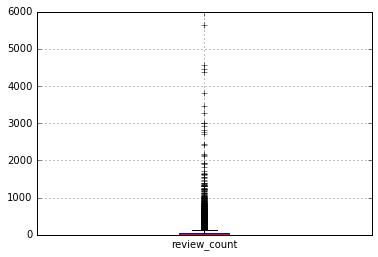

In [92]:
### Boxplot
data.boxplot(column='review_count',return_type='axes')

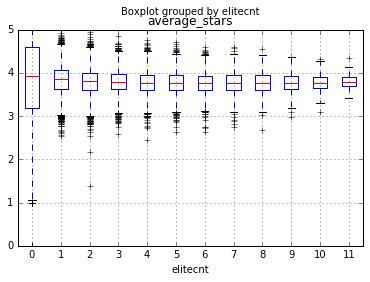

In [42]:
### Boxplot with Group by
data.boxplot(column='average_stars', by = 'elitecnt')

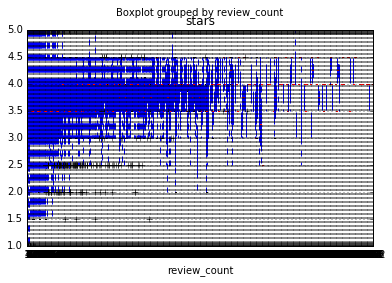

In [94]:
data.boxplot(column='stars', by = 'review_count')

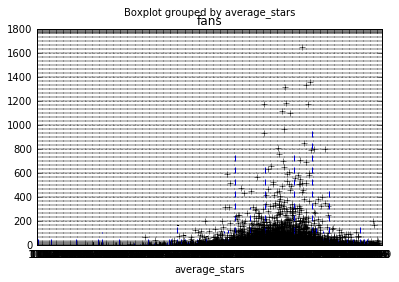

In [44]:
data.boxplot(column='fans', by = 'average_stars')

In [ ]:
### GET UNIQUE VALUES OF A PARTICULAR COLUMN
set(data["city"])

In [ ]:
data.loc[0,"attributes"]

In [ ]:
### ACCESS ELEMENTS USING INDEX NUMBERS
data.iloc[3:5,2:4]

In [ ]:
### ACCESS ELEMENTS USING COLUMN NAMES
data.loc[0,"attributes"]